In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# filter warnings
import warnings
warnings.filterwarnings('ignore')

# the below code will create a data set which is not linear

In [10]:
x = np.linspace(-6, 6, 100)
y = np.sqrt(10**2-x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [13]:
x1 = np.linspace(-6, 6, 100)
y1 = np.sqrt(4**2-x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

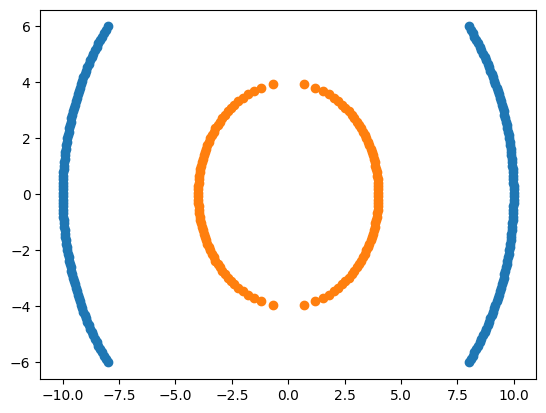

In [16]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [21]:
df1 = pd.DataFrame(np.vstack([y, x]).T,columns=['x1','x2'])
df1['Y']=0
df2 = pd.DataFrame(np.vstack([y1, x1]).T,columns=['x1','x2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)
df

,x1,x2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [22]:
df1 = df.copy()
df1

,x1,x2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
395,NaN,-5.515152,1
396,NaN,-5.636364,1
397,NaN,-5.757576,1
398,NaN,-5.878788,1


In [23]:
df1["x1Square"] = df["x1"]**2
df1["x2Square"] = df["x2"]**2
df1["x1x2"] = df["x1"]*df["x2"]
df1.head()

,x1,x2,Y,x1Square,x2Square,x1x2
0,8.000000,-6.000000,0,64.000000,36.000000,-48.000000
1,8.089490,-5.878788,0,65.439853,34.560147,-47.556397
2,8.176205,-5.757576,0,66.850321,33.149679,-47.075117
3,8.260230,-5.636364,0,68.231405,31.768595,-46.557662
4,8.341649,-5.515152,0,69.583104,30.416896,-46.005457


In [39]:
df1 = df1.dropna()
X = df1[["x1Square", "x2Square","x1x2"]]
y = df1["Y"]

In [40]:
X

,x1Square,x2Square,x1x2
0,64.000000,36.000000,-48.000000
1,65.439853,34.560147,-47.556397
2,66.850321,33.149679,-47.075117
3,68.231405,31.768595,-46.557662
4,69.583104,30.416896,-46.005457
...,...,...,...
378,4.066116,11.933884,6.965957
379,3.213958,12.786042,6.410445
380,2.332415,13.667585,5.646103
381,1.421488,14.578512,4.552271


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
378    1
379    1
380    1
381    1
382    1
Name: Y, Length: 332, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [43]:
import plotly.express as px

In [44]:
fig = px.scatter_3d(df1, x="x1Square", y="x2Square", z="x1x2")
fig.show()

In [45]:
from sklearn.svm import SVC # support vector classifier
classifier = SVC(kernel="linear")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [46]:
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [47]:
df = df.dropna()

In [48]:
df

,x1,x2,Y
0,8.000000,-6.000000,0
1,8.089490,-5.878788,0
2,8.176205,-5.757576,0
3,8.260230,-5.636364,0
4,8.341649,-5.515152,0
...,...,...,...
378,-2.016461,-3.454545,1
379,-1.792751,-3.575758,1
380,-1.527225,-3.696970,1
381,-1.192262,-3.818182,1


# compare it without doing any extra feature showing that Kernel in SVM is just a trick not an algorithm , in the above data frame df1 we have added x1square , x2 square, x1x2 as extra feature to have more feature and can use kernel as 'linear'

In [50]:
X=df[["x1","x2"]]
y=df["Y"]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [52]:
from sklearn.svm import SVC # support vector classifier
classifier = SVC(kernel="rbf")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [53]:
from sklearn.svm import SVC # support vector classifier
classifier = SVC(kernel="poly")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.62

In [54]:
from sklearn.svm import SVC # support vector classifier
classifier = SVC(kernel="sigmoid")
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)

0.65